In [4]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
import numpy as np
import matplotlib.pyplot as plt
import sys; sys.path.insert(0, '../')
import geoplot.crs as ccrs
import geoplot as gplt
import shapely
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
# Boroughs
boroughs = gpd.read_file("../data/nyc_boroughs/boroughs.geojson", driver='GeoJSON')
boroughs['Population'] = [378, 1951, 2300, 1487, 1203]
boroughs['Population Density'] = boroughs['Population'] / boroughs['Shape_Area']
boroughs = boroughs.set_index('BoroName')
boroughs.index = [b.upper() for b in boroughs.index]

# Collisions
collisions = pd.read_csv("../data/nyc_collisions/NYPD_Motor_Vehicle_Collisions_2016.csv", index_col=0)

def pointify(srs):
    lat, long = srs['LATITUDE'], srs['LONGITUDE']
    if pd.isnull(lat) or pd.isnull(long):
        return shapely.geometry.Point(0, 0)
    else:
        return shapely.geometry.Point(long, lat)

collisions = gpd.GeoDataFrame(collisions.head(100000), geometry=collisions.head(100000).apply(pointify, axis='columns'))
collisions = collisions[collisions.geometry.map(lambda srs: not (srs.x == 0))]

In [12]:
len(collisions)

57956

In [23]:
collisions['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()

Unspecified                                              29977
Driver Inattention/Distraction                            8797
Failure to Yield Right-of-Way                             2567
Following Too Closely                                     2263
Backing Unsafely                                          1702
Fatigued/Drowsy                                           1230
Other Vehicular                                           1156
Turning Improperly                                        1001
Passing or Lane Usage Improper                             938
Unsafe Lane Changing                                       917
Driver Inexperience                                        657
Lost Consciousness                                         651
Traffic Control Disregarded                                584
Alcohol Involvement                                        452
Reaction to Other Uninvolved Vehicle                       417
Unsafe Speed                                           

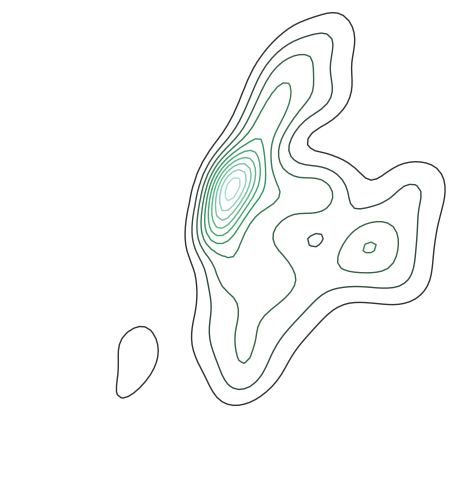

In [19]:
gplt.kdeplot(collisions[collisions["CONTRIBUTING FACTOR VEHICLE 1"] == 'Driver Inattention/Distraction'],
             projection=ccrs.AlbersEqualArea())

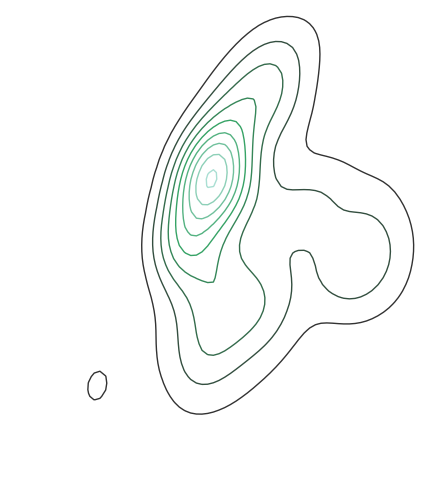

In [24]:
gplt.kdeplot(collisions[collisions["CONTRIBUTING FACTOR VEHICLE 1"] == 'Driver Inexperience'],
             projection=ccrs.AlbersEqualArea())

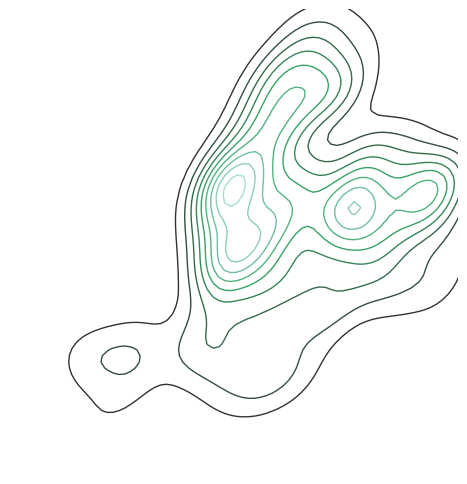

In [21]:
gplt.kdeplot(collisions[collisions["CONTRIBUTING FACTOR VEHICLE 1"] == 'Following Too Closely'],
             projection=ccrs.AlbersEqualArea())

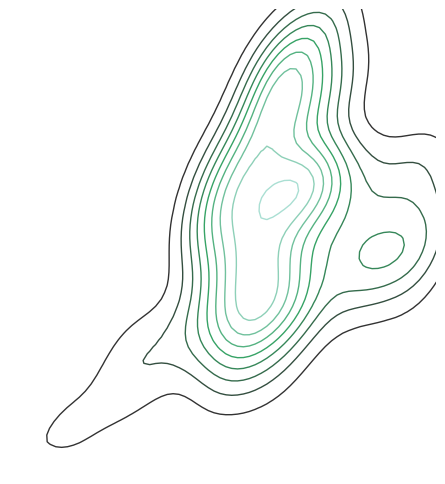

In [25]:
gplt.kdeplot(collisions[collisions["CONTRIBUTING FACTOR VEHICLE 1"] == 'Alcohol Involvement'],
             projection=ccrs.AlbersEqualArea())

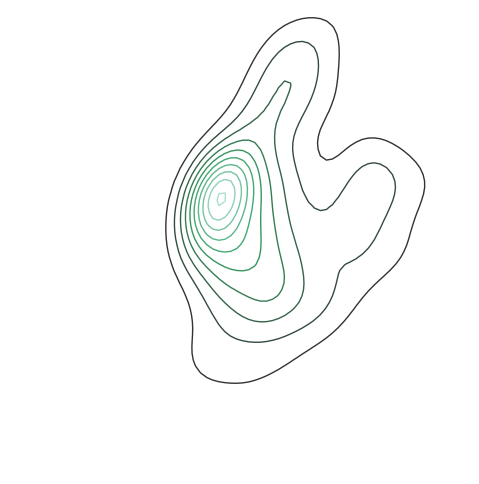

In [26]:
gplt.kdeplot(collisions[collisions["CONTRIBUTING FACTOR VEHICLE 1"] == 'Lost Consciousness'],
             projection=ccrs.AlbersEqualArea())

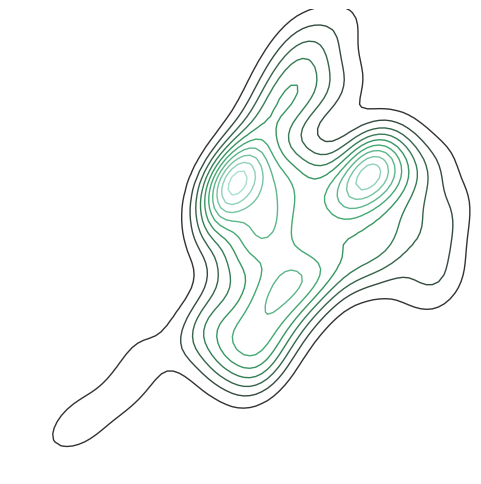

In [27]:
gplt.kdeplot(collisions[collisions["CONTRIBUTING FACTOR VEHICLE 1"] == 'Failure to Yield Right-of-Way'],
             projection=ccrs.AlbersEqualArea())

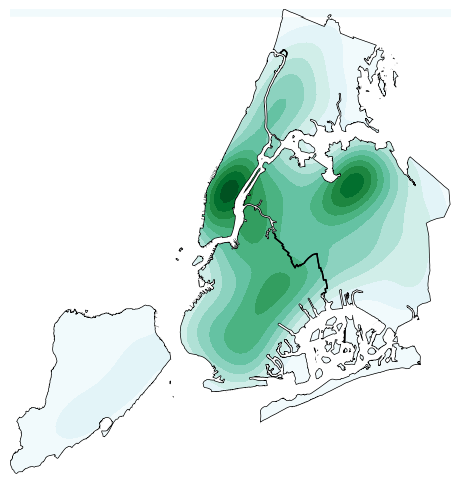

In [31]:
ax = gplt.kdeplot(collisions[collisions["CONTRIBUTING FACTOR VEHICLE 1"] == 'Failure to Yield Right-of-Way'],
                  projection=ccrs.AlbersEqualArea(), shade=True, clip=boroughs.geometry)
gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea(), ax=ax)

In [35]:
# ax = gplt.kdeplot(collisions[collisions["CONTRIBUTING FACTOR VEHICLE 1"] == 'Following Too Closely'],
#                   projection=ccrs.AlbersEqualArea(), shade=True, clip=boroughs.geometry)
# gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea(), ax=ax)

In [36]:
# ax = gplt.kdeplot(collisions[collisions["CONTRIBUTING FACTOR VEHICLE 1"] == 'Alcohol Involvement'],
#                   projection=ccrs.AlbersEqualArea(), shade=True, clip=boroughs.geometry)
# gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea(), ax=ax)

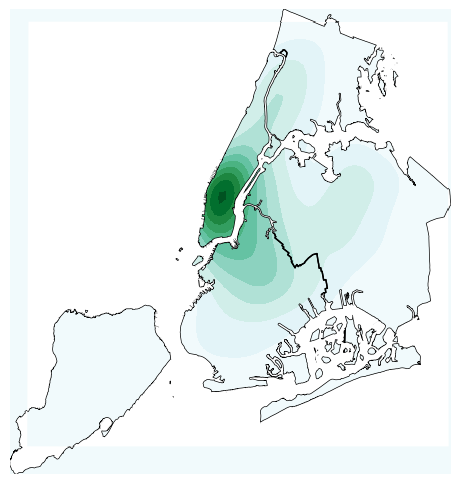

In [34]:
ax = gplt.kdeplot(collisions[collisions["CONTRIBUTING FACTOR VEHICLE 1"] == 'Lost Consciousness'],
                  projection=ccrs.AlbersEqualArea(), shade=True, clip=boroughs.geometry)
gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea(), ax=ax)

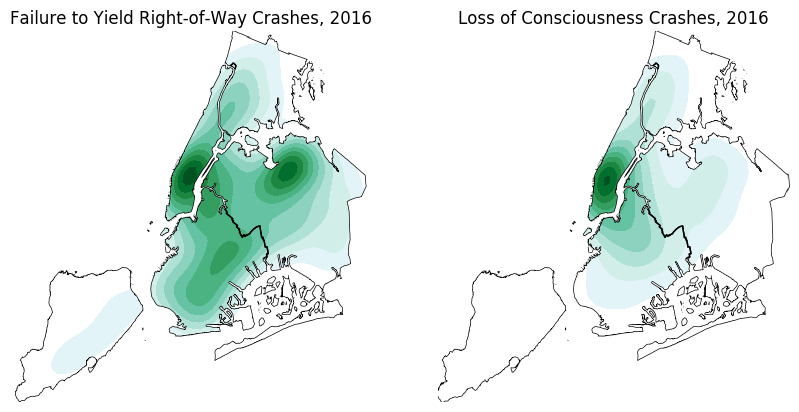

In [39]:
fig = plt.figure(figsize=(10,5))
ax1 = plt.subplot(121, projection=ccrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059))
gplt.kdeplot(collisions[collisions["CONTRIBUTING FACTOR VEHICLE 1"] == 'Failure to Yield Right-of-Way'],
             projection=ccrs.AlbersEqualArea(), shade=True, clip=boroughs.geometry, shade_lowest=False, ax=ax1)
gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea(), ax=ax1)
plt.title("Failure to Yield Right-of-Way Crashes, 2016")

ax2 = plt.subplot(122, projection=ccrs.AlbersEqualArea(central_latitude=40.7128, central_longitude=-74.0059))
gplt.kdeplot(collisions[collisions["CONTRIBUTING FACTOR VEHICLE 1"] == 'Lost Consciousness'],
             projection=ccrs.AlbersEqualArea(), shade=True, clip=boroughs.geometry, shade_lowest=False, ax=ax2)
gplt.polyplot(boroughs, projection=ccrs.AlbersEqualArea(), ax=ax2)
plt.title("Loss of Consciousness Crashes, 2016")

# plt.savefig("nyc-collisions-map.png", bbox_inches='tight', pad_inches=0)